In [1]:
pip install numpy scipy matplotlib networkx

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Example room sizes (in sqft) and their optimal positions
room_sizes = np.array([700, 500, 200, 200, 200, 200, 150])  # Living, Dining, Kitchen, Bedroom1, Bedroom2, Bedroom3, Bath1
# These positions would come from your optimization result; for simplicity, we'll simulate them.
room_positions = np.random.rand(len(room_sizes), 2) * 10  # Random positions for visualization

# Adjacency matrix (as described before, but simplified for example)
adjacency_matrix = np.random.choice([-1, 0, 1], size=(len(room_sizes), len(room_sizes)))
np.fill_diagonal(adjacency_matrix, 0)  # No room is adjacent to itself

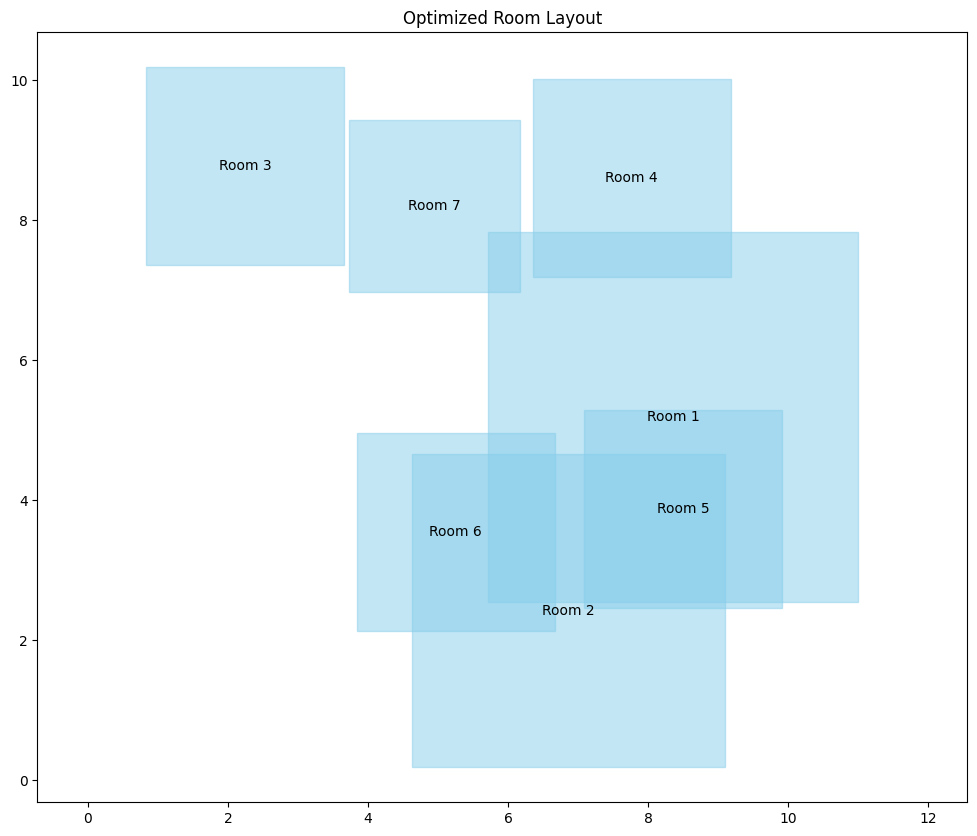

In [3]:
plt.figure(figsize=(12, 10))
for i, size in enumerate(room_sizes):
    # Scale size for visual appeal; this would need adjustment based on actual room dimensions
    width = height = np.sqrt(size) * 0.2  
    rect = plt.Rectangle(room_positions[i], width, height, fill=True, color='skyblue', alpha=0.5)
    plt.gca().add_patch(rect)
    plt.text(room_positions[i][0] + width/2, room_positions[i][1] + height/2, f'Room {i+1}', 
              horizontalalignment='center', verticalalignment='center')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Optimized Room Layout')
plt.axis('equal')  # So that the aspect ratio is equal
plt.show()

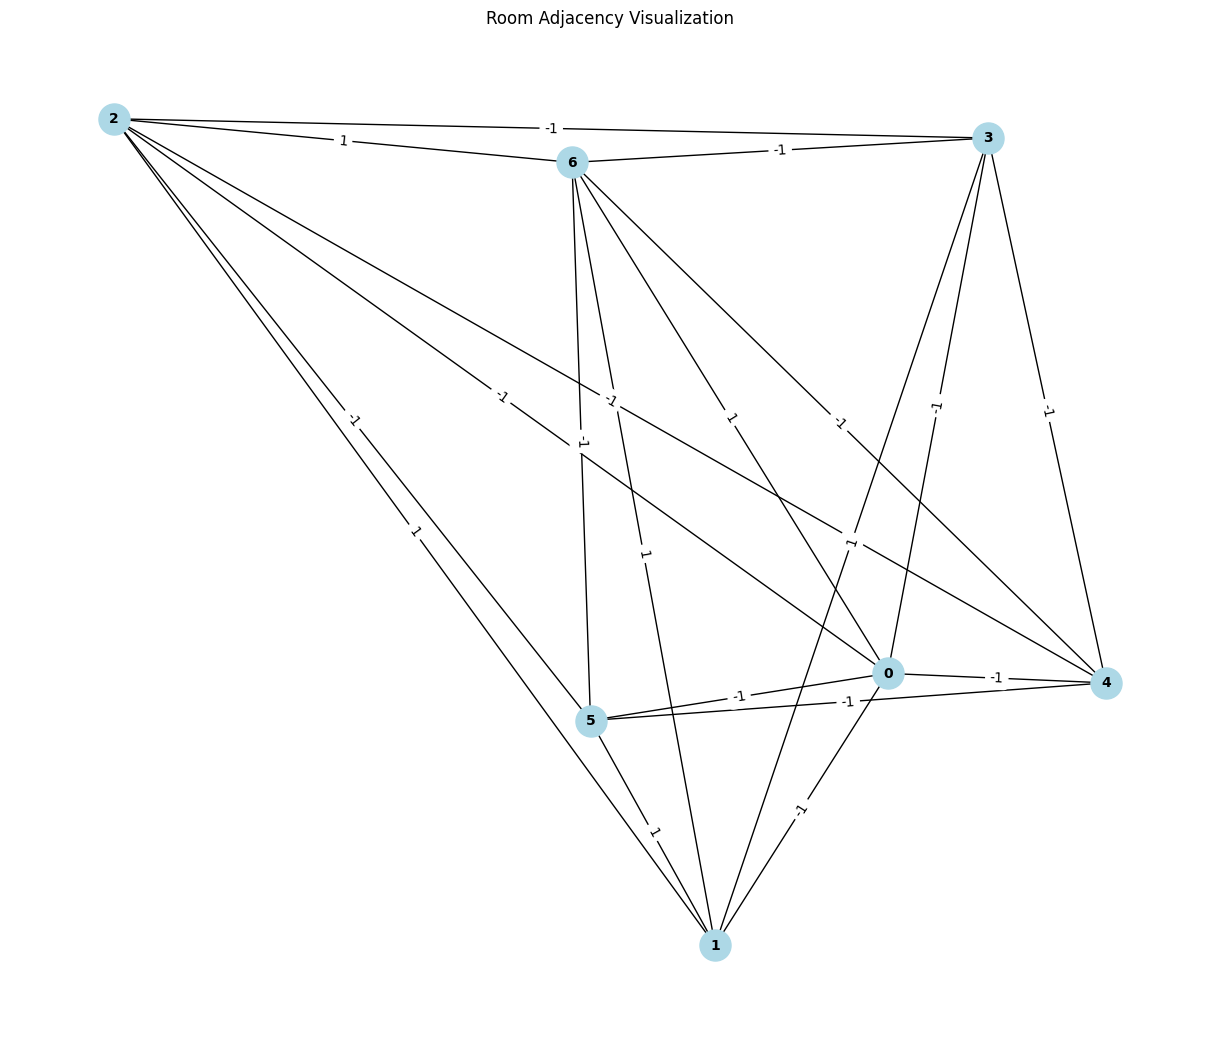

In [4]:
G = nx.from_numpy_array(adjacency_matrix)
pos = {i: tuple(room_positions[i]) for i in range(len(room_sizes))}  # Use our simulated positions

plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=10, font_weight='bold')

# Draw edge labels to show preference (-1, 0, 1)
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Room Adjacency Visualization')
plt.show()